In [1]:
import pickle


with open('df_test_sample.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (15,9)}) 

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve
RAND = 10
import warnings
warnings.filterwarnings("ignore");

In [3]:
data

,application_id_axi,loan_id,client_type,application_timestamp_created,application_date_created,application_duration,application_rate,amount_requested,amount_approved,amount_issued,...,avgcurbal_shoutstpastduegoodmfkmkk14nbki,avgcurbal_shoutstpastduegoodmfkmkk21nbki,avgcurbal_shoutstpastduegoodmfkmkk30nbki,avgcurbal_shoutstpastduegoodmfkmkk60nbki,avgcurbal_shoutstpastduegoodmfkmkk90nbki,avgcurbal_shoutstpastduegoodmfkmkk180nbki,avgcurbal_shoutstpastduegoodmfkmkk270nbki,avgcurbal_shoutstpastduegoodmfkmkk365nbki,segment,OOT
0,1534187-1,NaN,newcomer,2022-01-01 00:08:03,2022-01-01,25,1.0,4000.0,0.0,NaN,...,0.666667,0.400000,0.500000,0.625000,0.625000,0.625000,0.625000,0.625000,SR,0
1,1534190-1,1534190.0,newcomer,2022-01-01 00:09:18,2022-01-01,13,1.0,12000.0,3000.0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loan,0
2,1534202-2,1534202.0,newcomer,2022-01-01 00:19:18,2022-01-01,7,0.0,12000.0,5000.0,5000.0,...,0.250000,0.142857,0.193276,0.331168,0.411428,0.411428,0.434065,0.622710,Loan,0
3,1534213-1,NaN,newcomer,2022-01-01 00:38:30,2022-01-01,24,1.0,16000.0,0.0,NaN,...,NaN,NaN,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,SR,0
4,1534219-2,1534219.0,newcomer,2022-01-01 00:45:08,2022-01-01,12,1.0,13000.0,5000.0,5000.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Loan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,1746585-1,NaN,newcomer,2022-02-10 23:50:19,2022-02-10,7,0.0,30000.0,NaN,NaN,...,0.000000,0.000000,0.000000,0.077999,0.250647,0.248231,0.248231,0.498820,None,1
40473,1746586-2,NaN,newcomer,2022-02-10 23:50:32,2022-02-10,7,0.0,12000.0,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,1
40474,1746594-1,NaN,newcomer,2022-02-10 23:53:10,2022-02-10,30,1.0,30000.0,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,1
40475,1746596-1,NaN,newcomer,2022-02-10 23:55:09,2022-02-10,19,1.0,3000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1


In [4]:
data['Target'] = np.where(data.segment == 'Loan', 1, 0)

In [5]:
data = data.fillna({'fpd30': 0})

In [6]:
data['fpd'] = np.where(data.fpd30 == 1, 0, 1)

In [7]:
dada=data[data['OOT']==0]

In [8]:
dada.Target

0        0
1        1
2        1
3        0
4        1
        ..
33087    0
33088    1
33089    1
33090    1
33091    1
Name: Target, Length: 33092, dtype: int32

In [9]:
dada.fpd

0        1
1        1
2        0
3        1
4        1
        ..
33087    1
33088    0
33089    1
33090    1
33091    1
Name: fpd, Length: 33092, dtype: int32

In [10]:
print('roc-auc:', roc_auc_score(dada.Target, dada.fpd30))
print('precision:', precision_score(dada.Target, dada.fpd30))
print('recall:', recall_score(dada.Target, dada.fpd30))
print('f1:', f1_score(dada.Target, dada.fpd30))
print('logloss:', log_loss(dada.Target, dada.fpd30))
print('gini:', 2*roc_auc_score(dada.Target, dada.fpd30)-1)

roc-auc: 0.6035742619733601
precision: 1.0
recall: 0.20714852394672012
f1: 0.3432030439294362
logloss: 19.818152006121235
gini: 0.20714852394672012


In [11]:
roc_auc_score(dada.Target, dada.fpd30)


0.6035742619733601

In [12]:
precision_score(dada.Target, dada.fpd30)


1.0

In [13]:
recall_score(dada.Target, dada.fpd30)


0.20714852394672012

In [14]:
f1_score(dada.Target, dada.fpd30)


0.3432030439294362

In [15]:
log_loss(dada.Target, dada.fpd30)

19.818152006121235

In [16]:
data

,application_id_axi,loan_id,client_type,application_timestamp_created,application_date_created,application_duration,application_rate,amount_requested,amount_approved,amount_issued,...,avgcurbal_shoutstpastduegoodmfkmkk30nbki,avgcurbal_shoutstpastduegoodmfkmkk60nbki,avgcurbal_shoutstpastduegoodmfkmkk90nbki,avgcurbal_shoutstpastduegoodmfkmkk180nbki,avgcurbal_shoutstpastduegoodmfkmkk270nbki,avgcurbal_shoutstpastduegoodmfkmkk365nbki,segment,OOT,Target,fpd
0,1534187-1,NaN,newcomer,2022-01-01 00:08:03,2022-01-01,25,1.0,4000.0,0.0,NaN,...,0.500000,0.625000,0.625000,0.625000,0.625000,0.625000,SR,0,0,1
1,1534190-1,1534190.0,newcomer,2022-01-01 00:09:18,2022-01-01,13,1.0,12000.0,3000.0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Loan,0,1,1
2,1534202-2,1534202.0,newcomer,2022-01-01 00:19:18,2022-01-01,7,0.0,12000.0,5000.0,5000.0,...,0.193276,0.331168,0.411428,0.411428,0.434065,0.622710,Loan,0,1,0
3,1534213-1,NaN,newcomer,2022-01-01 00:38:30,2022-01-01,24,1.0,16000.0,0.0,NaN,...,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,SR,0,0,1
4,1534219-2,1534219.0,newcomer,2022-01-01 00:45:08,2022-01-01,12,1.0,13000.0,5000.0,5000.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Loan,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,1746585-1,NaN,newcomer,2022-02-10 23:50:19,2022-02-10,7,0.0,30000.0,NaN,NaN,...,0.000000,0.077999,0.250647,0.248231,0.248231,0.498820,None,1,0,1
40473,1746586-2,NaN,newcomer,2022-02-10 23:50:32,2022-02-10,7,0.0,12000.0,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,1,0,1
40474,1746594-1,NaN,newcomer,2022-02-10 23:53:10,2022-02-10,30,1.0,30000.0,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,1,0,1
40475,1746596-1,NaN,newcomer,2022-02-10 23:55:09,2022-02-10,19,1.0,3000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,1,0,1


In [17]:
num_cols  =['application_id_axi',
            'application_timestamp_created',
            'application_duration',
            'application_rate',
            'amount_requested',
            'loan_rate',
            'sourcedeviceclientformcount',
            'sourcedevicetimezone',
            'sourceipclientformcount',
            'onage',             
            'lastemployementstatus',
            'offamilystatuscurrentapplication',
            'educationapplication',
            'risk_factor_sumnextpayment',
            'card_exp_date',
            'sumnextpmtnbch',
            'cntallnbki', 
            'finalscore_point']

cat_cols = ['onsex', 
            'aquisition_channel',
            'snils_check',            
            'ofcustfactaddressequaltoothercustfactaddress',
            'clean_stream_flg',
            'fpd30', 
            'OOT']


feature_cols = num_cols + cat_cols
target_col = 'fpd30'

In [18]:
df = data[feature_cols]

In [19]:
df

,application_id_axi,application_timestamp_created,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,...,sumnextpmtnbch,cntallnbki,finalscore_point,onsex,aquisition_channel,snils_check,ofcustfactaddressequaltoothercustfactaddress,clean_stream_flg,fpd30,OOT
0,1534187-1,2022-01-01 00:08:03,25,1.0,4000.0,NaN,12,3,1,20,...,21047,11.0,0.645311,2,1,1,1,N,0.0,0
1,1534190-1,2022-01-01 00:09:18,13,1.0,12000.0,1.0,7,3,6,36,...,28342,15.0,0.271150,1,2,0,0,N,0.0,0
2,1534202-2,2022-01-01 00:19:18,7,0.0,12000.0,0.0,5,10,7,23,...,160226,82.0,0.236392,1,2,1,1,N,1.0,0
3,1534213-1,2022-01-01 00:38:30,24,1.0,16000.0,NaN,3,3,14,44,...,20000,4.0,0.758785,1,2,0,1,N,0.0,0
4,1534219-2,2022-01-01 00:45:08,12,1.0,13000.0,1.0,3,10,10,40,...,6500,3.0,0.256546,2,2,1,0,N,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,1746585-1,2022-02-10 23:50:19,7,0.0,30000.0,NaN,0,3,20,35,...,47333,13.0,NaN,1,2,1,1,N,0.0,1
40473,1746586-2,2022-02-10 23:50:32,7,0.0,12000.0,NaN,1,5,1,18,...,5000,1.0,NaN,1,2,1,0,N,0.0,1
40474,1746594-1,2022-02-10 23:53:10,30,1.0,30000.0,NaN,2,None,1,21,...,0,1.0,NaN,2,2,1,0,N,0.0,1
40475,1746596-1,2022-02-10 23:55:09,19,1.0,3000.0,NaN,0,3,9,23,...,7329,11.0,NaN,1,2,1,0,N,0.0,1


In [20]:
df = df.fillna({'loan_rate': df.loan_rate.median()})
df = df.fillna({'sourcedevicetimezone': df.sourcedevicetimezone.median()})
df = df.fillna({'risk_factor_sumnextpayment': df.risk_factor_sumnextpayment.median()})
df = df.fillna({'cntallnbki': df.cntallnbki.median()})
df = df.fillna({'fpd30': 0})



In [21]:
df

,application_id_axi,application_timestamp_created,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,...,sumnextpmtnbch,cntallnbki,finalscore_point,onsex,aquisition_channel,snils_check,ofcustfactaddressequaltoothercustfactaddress,clean_stream_flg,fpd30,OOT
0,1534187-1,2022-01-01 00:08:03,25,1.0,4000.0,1.0,12,3,1,20,...,21047,11.0,0.645311,2,1,1,1,N,0.0,0
1,1534190-1,2022-01-01 00:09:18,13,1.0,12000.0,1.0,7,3,6,36,...,28342,15.0,0.271150,1,2,0,0,N,0.0,0
2,1534202-2,2022-01-01 00:19:18,7,0.0,12000.0,0.0,5,10,7,23,...,160226,82.0,0.236392,1,2,1,1,N,1.0,0
3,1534213-1,2022-01-01 00:38:30,24,1.0,16000.0,1.0,3,3,14,44,...,20000,4.0,0.758785,1,2,0,1,N,0.0,0
4,1534219-2,2022-01-01 00:45:08,12,1.0,13000.0,1.0,3,10,10,40,...,6500,3.0,0.256546,2,2,1,0,N,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,1746585-1,2022-02-10 23:50:19,7,0.0,30000.0,1.0,0,3,20,35,...,47333,13.0,NaN,1,2,1,1,N,0.0,1
40473,1746586-2,2022-02-10 23:50:32,7,0.0,12000.0,1.0,1,5,1,18,...,5000,1.0,NaN,1,2,1,0,N,0.0,1
40474,1746594-1,2022-02-10 23:53:10,30,1.0,30000.0,1.0,2,3.0,1,21,...,0,1.0,NaN,2,2,1,0,N,0.0,1
40475,1746596-1,2022-02-10 23:55:09,19,1.0,3000.0,1.0,0,3,9,23,...,7329,11.0,NaN,1,2,1,0,N,0.0,1


In [22]:
df.describe()

,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourceipclientformcount,onage,lastemployementstatus,offamilystatuscurrentapplication,educationapplication,risk_factor_sumnextpayment,sumnextpmtnbch,cntallnbki,finalscore_point,fpd30,OOT
count,40477.000000,40477.000000,40477.000000,40477.000000,40477.000000,40477.000000,40477.000000,40477.000000,40477.000000,40477.000000,4.047700e+04,4.047700e+04,40477.000000,33092.000000,40477.000000,40477.000000
mean,19.792475,0.747941,11339.526151,0.820239,81.138498,6.339921,31.061541,5.765966,1.934506,3.304692,3.543084e+04,5.630903e+04,28.064061,0.303175,0.122563,0.182449
std,9.481288,0.434185,8576.001600,0.383988,298.869435,9.509530,9.789944,1.369807,1.202139,1.090858,4.765466e+06,9.286872e+04,36.084957,0.185268,0.327939,0.386219
min,7.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,2.000000,0.000000e+00,0.000000e+00,1.000000,0.032726,0.000000,0.000000
25%,7.000000,0.000000,5000.000000,1.000000,0.000000,0.000000,23.000000,6.000000,1.000000,3.000000,0.000000e+00,8.110000e+03,10.000000,0.159483,0.000000,0.000000
50%,23.000000,1.000000,10000.000000,1.000000,3.000000,3.000000,30.000000,6.000000,2.000000,3.000000,4.000000e+03,3.099200e+04,19.000000,0.242420,0.000000,0.000000
75%,30.000000,1.000000,15000.000000,1.000000,24.000000,8.000000,37.000000,6.000000,2.000000,4.000000,1.000000e+04,7.548200e+04,34.000000,0.510535,0.000000,0.000000
max,30.000000,1.000000,30000.000000,1.000000,3098.000000,400.000000,83.000000,7.000000,5.000000,7.000000,9.539022e+08,3.867169e+06,1420.000000,0.843528,1.000000,1.000000


In [23]:
df.nunique()

application_id_axi                              40477
application_timestamp_created                   40193
application_duration                               24
application_rate                                    3
amount_requested                                   30
loan_rate                                           3
sourcedeviceclientformcount                      1589
sourcedevicetimezone                               22
sourceipclientformcount                            78
onage                                              64
lastemployementstatus                               7
offamilystatuscurrentapplication                    5
educationapplication                                6
risk_factor_sumnextpayment                        800
card_exp_date                                      96
sumnextpmtnbch                                  27054
cntallnbki                                        345
finalscore_point                                32450
onsex                       

In [24]:
df.describe(include=object)

,application_id_axi,sourcedevicetimezone,card_exp_date,onsex,aquisition_channel,snils_check,ofcustfactaddressequaltoothercustfactaddress,clean_stream_flg
count,40477,40477,40477,40477,40477,40477,40477,40477
unique,40477,22,96,2,2,2,2,2
top,1534187-1,3,0924,1,2,1,0,N
freq,1,22606,1761,23702,34622,31538,24953,38534


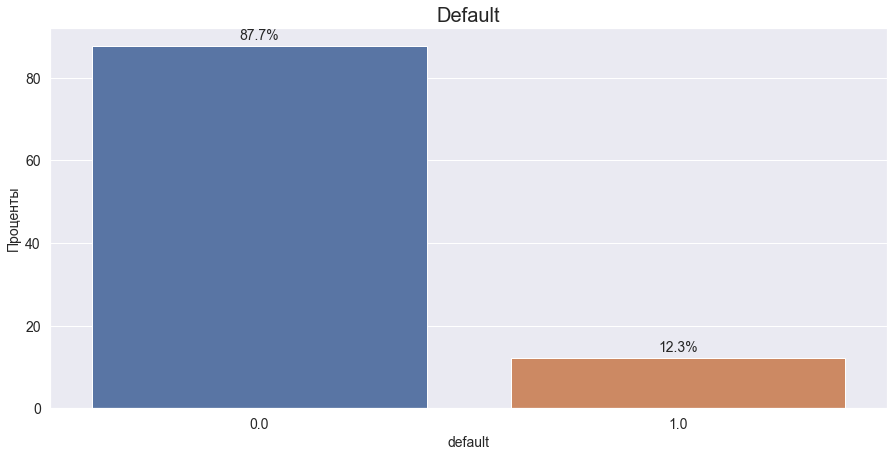

In [25]:
# нормирование на размер датасета
norm_target = (df
               .fpd30
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

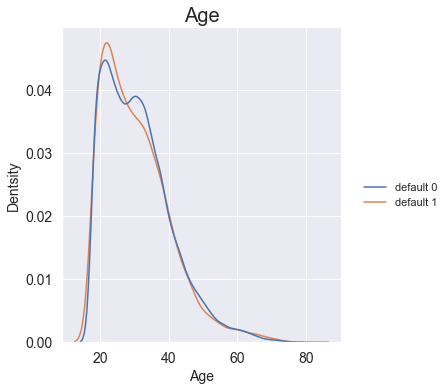

In [26]:
sns.displot(
    {
        "default 0": df[df.fpd30 == 0].onage,
        "default 1": df[df.fpd30 == 1].onage
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [27]:
df.groupby('fpd30')['onage'].median()

fpd30
0.0    30.0
1.0    29.0
Name: onage, dtype: float64

In [28]:
df.groupby('fpd30')['onage'].mean()

fpd30
0.0    31.112935
1.0    30.693610
Name: onage, dtype: float64

In [29]:

df.groupby('fpd30')['onage'].apply(lambda x: x.value_counts().index[0]).reset_index()

,fpd30,onage
0,0.0,19
1,1.0,19


In [30]:
df.educationapplication.unique()

array([3, 5, 2, 4, 6, 7], dtype=int64)

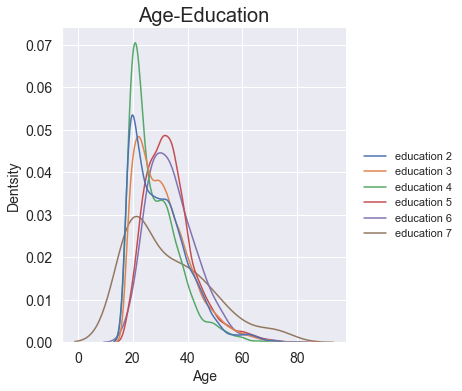

In [31]:
sns.displot(
    {
        "education 2": df[df.educationapplication == 2].onage,
        "education 3": df[df.educationapplication == 3].onage,
        "education 4": df[df.educationapplication == 4].onage,
        "education 5": df[df.educationapplication == 5].onage,
        "education 6": df[df.educationapplication == 6].onage,
        "education 7": df[df.educationapplication == 7].onage,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

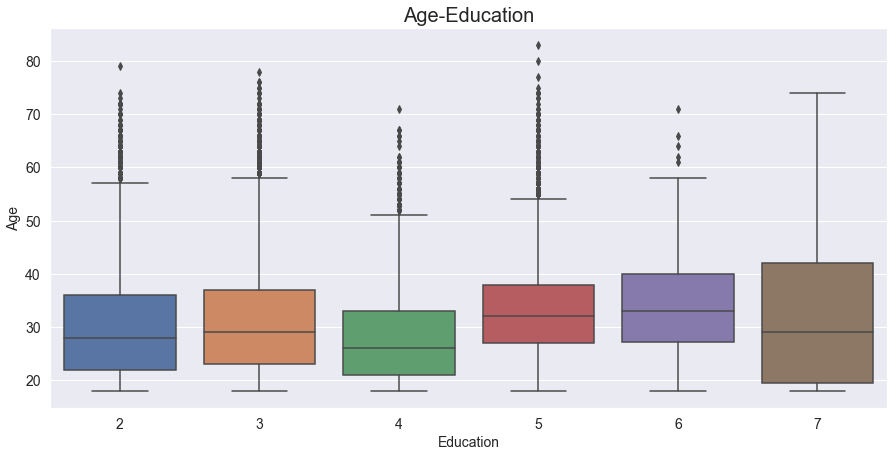

In [32]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='educationapplication', y='onage', data=df)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

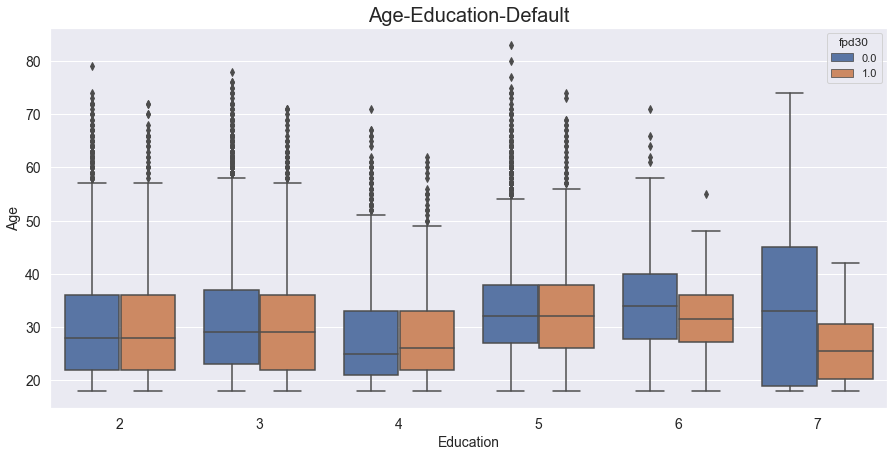

In [33]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='educationapplication', y='onage', hue='fpd30', data=df)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [34]:

df.groupby('educationapplication')['onage'].median()

educationapplication
2    28.0
3    29.0
4    26.0
5    32.0
6    33.0
7    29.0
Name: onage, dtype: float64

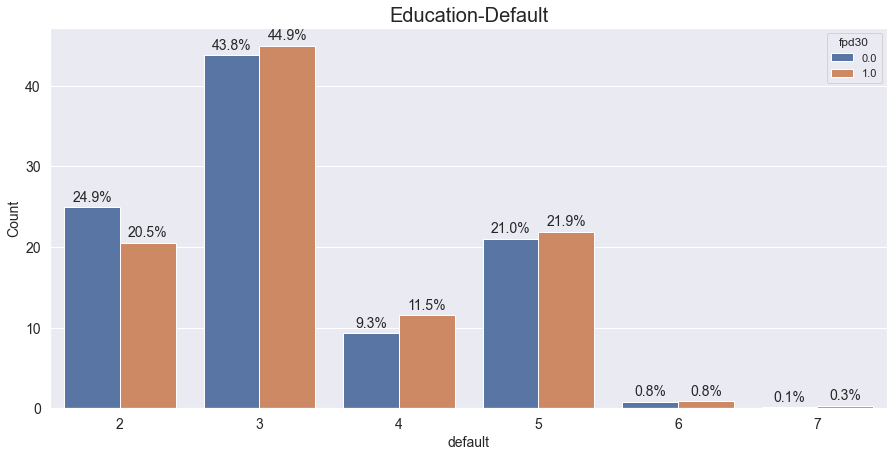

In [35]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['fpd30'])['educationapplication']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('educationapplication'))

ax = sns.barplot(x="educationapplication", y="percentage", hue="fpd30", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

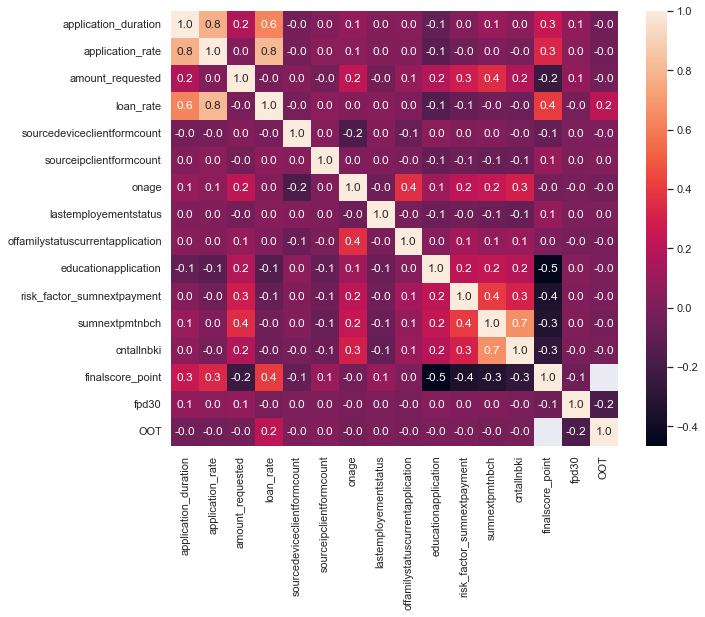

In [36]:

plt.figure(figsize=(10, 8))

sns.heatmap(df[feature_cols].corr(method='spearman'), annot=True, fmt=".1f");

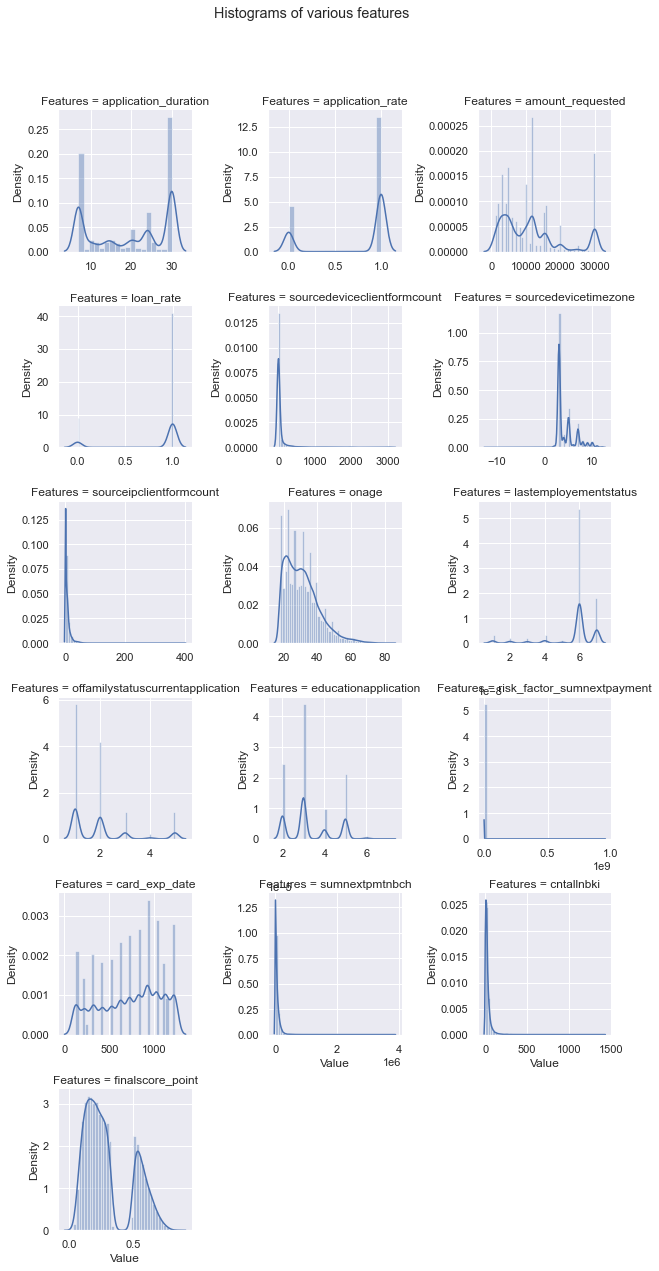

In [37]:
nu_cols  =[ 'application_duration',
            'application_rate',
            'amount_requested',
            'loan_rate',
            'sourcedeviceclientformcount',
            'sourcedevicetimezone',
            'sourceipclientformcount',
            'onage',             
            'lastemployementstatus',
            'offamilystatuscurrentapplication',
            'educationapplication',
            'risk_factor_sumnextpayment',
            'card_exp_date',
            'sumnextpmtnbch',
            'cntallnbki', 
            'finalscore_point']


numeric_features = df[nu_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [38]:
for i in ['sourcedeviceclientformcount', 'sourceipclientformcount','onage','risk_factor_sumnextpayment','sumnextpmtnbch','cntallnbki']:
    df[i] = np.log(df[i]+1)

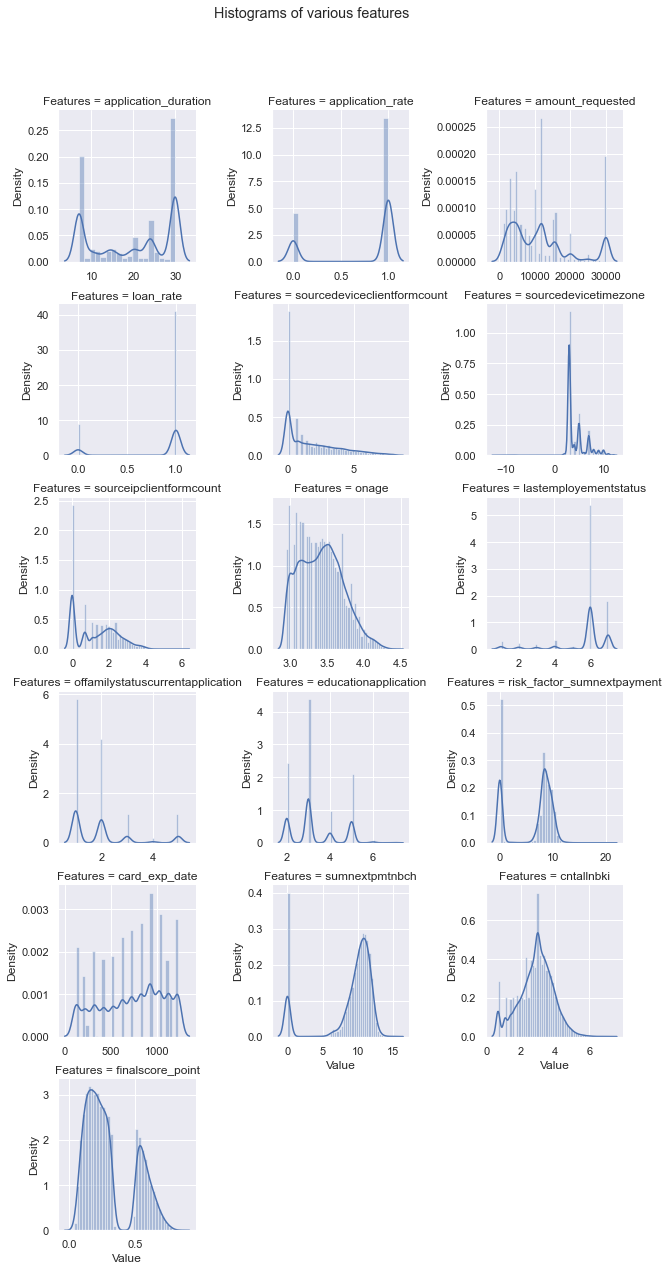

In [39]:
numeric_features = df[nu_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [40]:
df

,application_id_axi,application_timestamp_created,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,...,sumnextpmtnbch,cntallnbki,finalscore_point,onsex,aquisition_channel,snils_check,ofcustfactaddressequaltoothercustfactaddress,clean_stream_flg,fpd30,OOT
0,1534187-1,2022-01-01 00:08:03,25,1.0,4000.0,1.0,2.564949,3,0.693147,3.044522,...,9.954561,2.484907,0.645311,2,1,1,1,N,0.0,0
1,1534190-1,2022-01-01 00:09:18,13,1.0,12000.0,1.0,2.079442,3,1.945910,3.610918,...,10.252135,2.772589,0.271150,1,2,0,0,N,0.0,0
2,1534202-2,2022-01-01 00:19:18,7,0.0,12000.0,0.0,1.791759,10,2.079442,3.178054,...,11.984347,4.418841,0.236392,1,2,1,1,N,1.0,0
3,1534213-1,2022-01-01 00:38:30,24,1.0,16000.0,1.0,1.386294,3,2.708050,3.806662,...,9.903538,1.609438,0.758785,1,2,0,1,N,0.0,0
4,1534219-2,2022-01-01 00:45:08,12,1.0,13000.0,1.0,1.386294,10,2.397895,3.713572,...,8.779711,1.386294,0.256546,2,2,1,0,N,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,1746585-1,2022-02-10 23:50:19,7,0.0,30000.0,1.0,0.000000,3,3.044522,3.583519,...,10.764984,2.639057,NaN,1,2,1,1,N,0.0,1
40473,1746586-2,2022-02-10 23:50:32,7,0.0,12000.0,1.0,0.693147,5,0.693147,2.944439,...,8.517393,0.693147,NaN,1,2,1,0,N,0.0,1
40474,1746594-1,2022-02-10 23:53:10,30,1.0,30000.0,1.0,1.098612,3.0,0.693147,3.091042,...,0.000000,0.693147,NaN,2,2,1,0,N,0.0,1
40475,1746596-1,2022-02-10 23:55:09,19,1.0,3000.0,1.0,0.000000,3,2.302585,3.178054,...,8.899731,2.484907,NaN,1,2,1,0,N,0.0,1


In [41]:
num_cols = list(df.dtypes[df.dtypes == float].index) + list(df.dtypes[df.dtypes == int].index)[1:-1]

In [42]:
num_cols

['application_rate',
 'amount_requested',
 'loan_rate',
 'sourcedeviceclientformcount',
 'sourceipclientformcount',
 'onage',
 'risk_factor_sumnextpayment',
 'sumnextpmtnbch',
 'cntallnbki',
 'finalscore_point',
 'fpd30']

In [43]:
df_label = pd.get_dummies(df, columns=cat_cols,
                          drop_first=True).drop('application_id_axi', axis=1)

In [44]:
df_label

,application_timestamp_created,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,lastemployementstatus,...,sumnextpmtnbch,cntallnbki,finalscore_point,onsex_2,aquisition_channel_2,snils_check_1,ofcustfactaddressequaltoothercustfactaddress_1,clean_stream_flg_Y,fpd30_1.0,OOT_1
0,2022-01-01 00:08:03,25,1.0,4000.0,1.0,2.564949,3,0.693147,3.044522,7,...,9.954561,2.484907,0.645311,1,0,1,1,0,0,0
1,2022-01-01 00:09:18,13,1.0,12000.0,1.0,2.079442,3,1.945910,3.610918,6,...,10.252135,2.772589,0.271150,0,1,0,0,0,0,0
2,2022-01-01 00:19:18,7,0.0,12000.0,0.0,1.791759,10,2.079442,3.178054,6,...,11.984347,4.418841,0.236392,0,1,1,1,0,1,0
3,2022-01-01 00:38:30,24,1.0,16000.0,1.0,1.386294,3,2.708050,3.806662,6,...,9.903538,1.609438,0.758785,0,1,0,1,0,0,0
4,2022-01-01 00:45:08,12,1.0,13000.0,1.0,1.386294,10,2.397895,3.713572,6,...,8.779711,1.386294,0.256546,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,2022-02-10 23:50:19,7,0.0,30000.0,1.0,0.000000,3,3.044522,3.583519,4,...,10.764984,2.639057,NaN,0,1,1,1,0,0,1
40473,2022-02-10 23:50:32,7,0.0,12000.0,1.0,0.693147,5,0.693147,2.944439,4,...,8.517393,0.693147,NaN,0,1,1,0,0,0,1
40474,2022-02-10 23:53:10,30,1.0,30000.0,1.0,1.098612,3.0,0.693147,3.091042,6,...,0.000000,0.693147,NaN,1,1,1,0,0,0,1
40475,2022-02-10 23:55:09,19,1.0,3000.0,1.0,0.000000,3,2.302585,3.178054,3,...,8.899731,2.484907,NaN,0,1,1,0,0,0,1


In [45]:
df_label_OOT_1 = df_label[df_label['OOT_1']==1]
df_label_OOT_0 = df_label[df_label['OOT_1']==0]


In [46]:
Z_OOT_1 = df_label_OOT_1.drop('OOT_1', axis=1)
Z_OOT_0 = df_label_OOT_0.drop('OOT_1', axis=1)

In [47]:

Z = Z_OOT_0.drop('fpd30_1.0', axis=1)
ZZ = Z.drop('application_timestamp_created', axis=1)
X = ZZ.drop('finalscore_point', axis=1)
y = Z_OOT_0['fpd30_1.0']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

In [48]:
X

,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,lastemployementstatus,offamilystatuscurrentapplication,educationapplication,risk_factor_sumnextpayment,card_exp_date,sumnextpmtnbch,cntallnbki,onsex_2,aquisition_channel_2,snils_check_1,ofcustfactaddressequaltoothercustfactaddress_1,clean_stream_flg_Y
0,25,1.0,4000.0,1.0,2.564949,3,0.693147,3.044522,7,5,3,8.517393,0924,9.954561,2.484907,1,0,1,1,0
1,13,1.0,12000.0,1.0,2.079442,3,1.945910,3.610918,6,2,5,10.308986,0224,10.252135,2.772589,0,1,0,0,0
2,7,0.0,12000.0,0.0,1.791759,10,2.079442,3.178054,6,1,3,9.615872,1122,11.984347,4.418841,0,1,1,1,0
3,24,1.0,16000.0,1.0,1.386294,3,2.708050,3.806662,6,3,2,7.601402,1122,9.903538,1.609438,0,1,0,1,0
4,12,1.0,13000.0,1.0,1.386294,10,2.397895,3.713572,6,1,4,0.000000,0826,8.779711,1.386294,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33087,14,1.0,10000.0,1.0,4.624973,3,4.204693,3.332205,7,1,5,7.601402,0724,9.998843,2.772589,0,1,1,0,0
33088,25,1.0,10000.0,1.0,2.197225,3,0.000000,3.663562,4,2,3,10.126671,0923,9.341369,3.332205,0,1,1,1,0
33089,7,0.0,12000.0,0.0,5.081404,3,0.000000,3.465736,6,1,5,9.615872,0123,10.721702,3.295837,0,1,1,1,0
33090,30,1.0,10000.0,1.0,5.686975,3,2.639057,3.258097,6,1,5,8.006701,0422,11.709125,4.219508,1,1,1,0,0


In [49]:
X.isna().sum() / X.shape[0]*100

application_duration                              0.0
application_rate                                  0.0
amount_requested                                  0.0
loan_rate                                         0.0
sourcedeviceclientformcount                       0.0
sourcedevicetimezone                              0.0
sourceipclientformcount                           0.0
onage                                             0.0
lastemployementstatus                             0.0
offamilystatuscurrentapplication                  0.0
educationapplication                              0.0
risk_factor_sumnextpayment                        0.0
card_exp_date                                     0.0
sumnextpmtnbch                                    0.0
cntallnbki                                        0.0
onsex_2                                           0.0
aquisition_channel_2                              0.0
snils_check_1                                     0.0
ofcustfactaddressequaltoothe

In [50]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [51]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.5709973259701958
precision: 0.17569659442724458
recall: 0.5491935483870968
f1: 0.2662236121970289
logloss: 15.672805669078226


In [52]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [53]:
metrics

,Baseline_LR
roc-auc,0.570997
precision,0.175697
recall,0.549194
f1,0.266224
logloss,15.672806


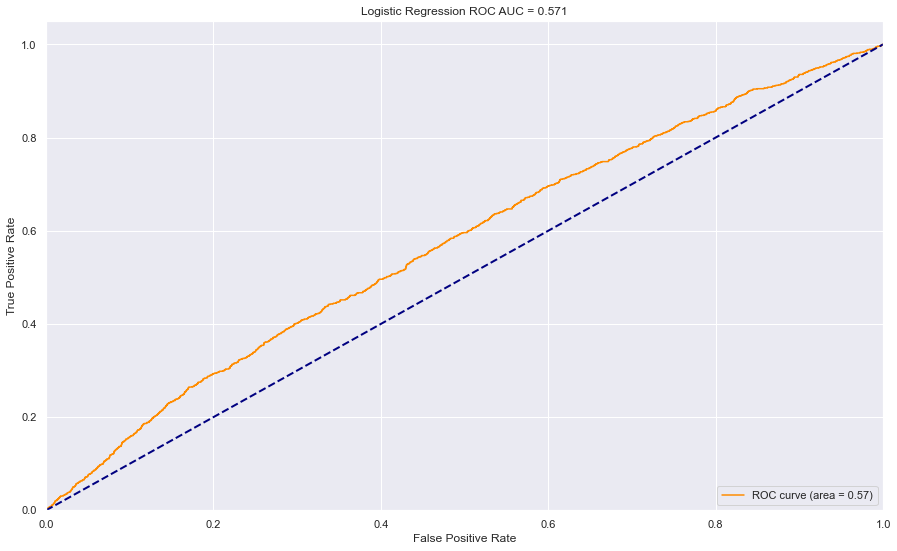

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [55]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [89]:
%%time

#grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.8s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.8s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   1.5s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, pe

[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=sag; total time=   2.9s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=sag; total time=   3.7s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=sag; total time=   3.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] EN

[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.4s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.6s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.4s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sa

[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.2s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.2s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.2s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.5s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.6s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.3s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total time=   2.5s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total time=   2.5s
[CV] END C=1.0, l1_ra

[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.5s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=e

[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.3s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.2s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.2s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=250.75

[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   2.7s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=sag; total time=   1.8s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=saga; total t

[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   6.7s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   7.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   7.6s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   7.5s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   9.1s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   8.2s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=elasticnet, solve

[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.5s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.5s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.6s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_rati

[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   2.6s
[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=saga; total time=   4.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=saga; total time=   4.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=lbf

[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=sag; total time=   1.6s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=sag; total time=   1.8s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=saga; total time=   3.8s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=saga; total time=   2.0s

[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   2.1s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=saga; total time=   2.7s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=saga; total time=   2.2s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=saga; total time=   3.7s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=elasticne

[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=saga; total time=  10.4s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=saga; total time=  10.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=saga; total time=   9.9s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.

[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   6.6s
[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=  10.4s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=   9.6s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=  10.1s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1,

[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.7s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.7s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.6s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.5s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total time=   2.6s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total t

[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   2.0s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.9s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   2.0s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   2.0s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solve

[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.3s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.2s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.2s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, 

[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=saga; total time=   7.4s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=saga; total time=   7.5s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.6s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.5s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=10

[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=saga; total time=   5.6s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=saga; total time=   5.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=saga; total time=   4.9s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   3.7s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   3.7s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   3.7s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   3.9s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total t

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': array([100, 200, 300, 400]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc', verbose=2)

In [90]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

0.5698989512723365
{'C': 500.5, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [91]:
best_params = {'C': 750.25, 
               'l1_ratio': 0.25,
               'max_iter': 200, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [59]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [60]:
y_pred_gr

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [61]:
y_score_gr.shape


(8273,)

In [62]:
data3=y_score_gr

In [63]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.5702055517078474
precision: 0.17469087082346751
recall: 0.535483870967742
f1: 0.2634397936917279
logloss: 15.501630012261801


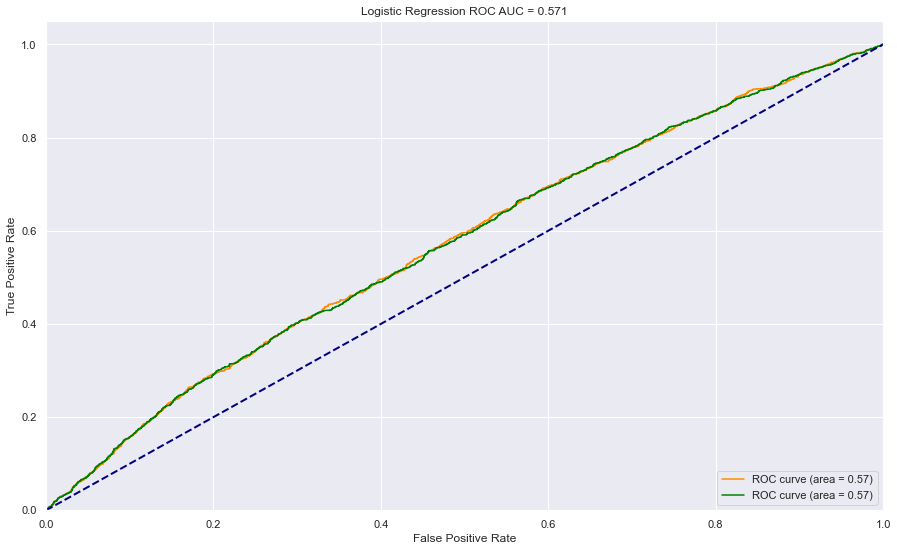

In [64]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [93]:

metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]

In [94]:
log_loss(y_test, y_pred_gr)

15.501630012261801

In [95]:

metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR
roc-auc,0.570997,0.570206
precision,0.175697,0.174691
recall,0.549194,0.535484
f1,0.266224,0.263440


In [68]:
lr_gr.coef_

array([[ 1.75931620e-02, -1.11806108e-03,  1.79501115e-05,
        -1.97707848e-02,  1.08082649e-03,  1.33466000e-02,
        -1.14271367e-03, -6.48082679e-02, -5.17734244e-02,
        -4.44157874e-02,  2.31289993e-02, -1.30864272e-02,
         3.75715846e-06,  1.87697107e-02, -5.27156554e-02,
        -2.13134903e-02,  5.13375751e-04, -9.77847370e-04,
        -1.56563433e-02,  7.14980330e-04]])

In [69]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [70]:
feature_imp

,feature,imp
10,educationapplication,0.023129
13,sumnextpmtnbch,0.018770
0,application_duration,0.017593
5,sourcedevicetimezone,0.013347
4,sourcedeviceclientformcount,0.001081
19,clean_stream_flg_Y,0.000715
16,aquisition_channel_2,0.000513
2,amount_requested,0.000018
12,card_exp_date,0.000004
17,snils_check_1,-0.000978


In [71]:
df_label_OOT_1 = df_label[df_label['OOT_1']==1]
df_label_OOT_0 = df_label[df_label['OOT_1']==0]
Z_OOT_1 = df_label_OOT_1.drop('OOT_1', axis=1)
Z_OOT_0 = df_label_OOT_0.drop('OOT_1', axis=1)

In [72]:
Z_1 = Z_OOT_1.drop('fpd30_1.0', axis=1)
ZZ_1 = Z_1.drop('application_timestamp_created', axis=1)
X_pred = ZZ_1.drop('finalscore_point', axis=1)


In [73]:
X_pred

,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,lastemployementstatus,offamilystatuscurrentapplication,educationapplication,risk_factor_sumnextpayment,card_exp_date,sumnextpmtnbch,cntallnbki,onsex_2,aquisition_channel_2,snils_check_1,ofcustfactaddressequaltoothercustfactaddress_1,clean_stream_flg_Y
33092,20,1.0,30000.0,1.0,2.397895,3,1.609438,3.135494,7,2,3,0.0000,0824,0.000000,1.098612,0,1,0,0,0
33093,22,1.0,10000.0,1.0,2.564949,7,1.386294,3.401197,6,2,3,0.0000,0523,10.004373,2.833213,0,0,1,0,0
33094,30,1.0,30000.0,1.0,4.025352,3,1.791759,2.995732,6,1,4,0.0000,0926,9.625822,1.945910,1,0,1,0,0
33095,10,1.0,6000.0,1.0,1.386294,5,0.693147,2.944439,6,1,3,8.2943,0726,6.969791,1.098612,0,1,1,1,0
33096,7,0.0,15000.0,1.0,1.386294,3,1.791759,3.258097,6,5,3,0.0000,0423,12.104040,3.555348,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,7,0.0,30000.0,1.0,0.000000,3,3.044522,3.583519,4,1,4,8.2943,0224,10.764984,2.639057,0,1,1,1,0
40473,7,0.0,12000.0,1.0,0.693147,5,0.693147,2.944439,4,1,4,8.2943,0623,8.517393,0.693147,0,1,1,0,0
40474,30,1.0,30000.0,1.0,1.098612,3.0,0.693147,3.091042,6,1,3,8.2943,0923,0.000000,0.693147,1,1,1,0,0
40475,19,1.0,3000.0,1.0,0.000000,3,2.302585,3.178054,3,1,2,8.2943,0423,8.899731,2.484907,0,1,1,0,0


In [74]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X, y)


y_predd = lr_gr.predict(X_pred)
y_scoree = lr_gr.predict_proba(X_pred)[:,1]

In [75]:
y_predd

array([1, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [76]:
y_scoree

array([0.58847805, 0.52242751, 0.65754794, ..., 0.65240636, 0.48613545,
       0.44967754])

In [77]:
X_pred['pred']=y_scoree

In [78]:
X_pred

,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,lastemployementstatus,offamilystatuscurrentapplication,...,risk_factor_sumnextpayment,card_exp_date,sumnextpmtnbch,cntallnbki,onsex_2,aquisition_channel_2,snils_check_1,ofcustfactaddressequaltoothercustfactaddress_1,clean_stream_flg_Y,pred
33092,20,1.0,30000.0,1.0,2.397895,3,1.609438,3.135494,7,2,...,0.0000,0824,0.000000,1.098612,0,1,0,0,0,0.588478
33093,22,1.0,10000.0,1.0,2.564949,7,1.386294,3.401197,6,2,...,0.0000,0523,10.004373,2.833213,0,0,1,0,0,0.522428
33094,30,1.0,30000.0,1.0,4.025352,3,1.791759,2.995732,6,1,...,0.0000,0926,9.625822,1.945910,1,0,1,0,0,0.657548
33095,10,1.0,6000.0,1.0,1.386294,5,0.693147,2.944439,6,1,...,8.2943,0726,6.969791,1.098612,0,1,1,1,0,0.478295
33096,7,0.0,15000.0,1.0,1.386294,3,1.791759,3.258097,6,5,...,0.0000,0423,12.104040,3.555348,1,1,1,0,0,0.376415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,7,0.0,30000.0,1.0,0.000000,3,3.044522,3.583519,4,1,...,8.2943,0224,10.764984,2.639057,0,1,1,1,0,0.551807
40473,7,0.0,12000.0,1.0,0.693147,5,0.693147,2.944439,4,1,...,8.2943,0623,8.517393,0.693147,0,1,1,0,0,0.540060
40474,30,1.0,30000.0,1.0,1.098612,3.0,0.693147,3.091042,6,1,...,8.2943,0923,0.000000,0.693147,1,1,1,0,0,0.652406
40475,19,1.0,3000.0,1.0,0.000000,3,2.302585,3.178054,3,1,...,8.2943,0423,8.899731,2.484907,0,1,1,0,0,0.486135


In [79]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))
print('gini:', 2*roc_auc_score(y_test, y_score_gr)-1)

roc-auc: 0.5702055517078474
precision: 0.17469087082346751
recall: 0.535483870967742
f1: 0.2634397936917279
logloss: 15.501630012261801
gini: 0.14041110341569474


In [80]:
Summary=X_pred

In [81]:
Summary

,application_duration,application_rate,amount_requested,loan_rate,sourcedeviceclientformcount,sourcedevicetimezone,sourceipclientformcount,onage,lastemployementstatus,offamilystatuscurrentapplication,...,risk_factor_sumnextpayment,card_exp_date,sumnextpmtnbch,cntallnbki,onsex_2,aquisition_channel_2,snils_check_1,ofcustfactaddressequaltoothercustfactaddress_1,clean_stream_flg_Y,pred
33092,20,1.0,30000.0,1.0,2.397895,3,1.609438,3.135494,7,2,...,0.0000,0824,0.000000,1.098612,0,1,0,0,0,0.588478
33093,22,1.0,10000.0,1.0,2.564949,7,1.386294,3.401197,6,2,...,0.0000,0523,10.004373,2.833213,0,0,1,0,0,0.522428
33094,30,1.0,30000.0,1.0,4.025352,3,1.791759,2.995732,6,1,...,0.0000,0926,9.625822,1.945910,1,0,1,0,0,0.657548
33095,10,1.0,6000.0,1.0,1.386294,5,0.693147,2.944439,6,1,...,8.2943,0726,6.969791,1.098612,0,1,1,1,0,0.478295
33096,7,0.0,15000.0,1.0,1.386294,3,1.791759,3.258097,6,5,...,0.0000,0423,12.104040,3.555348,1,1,1,0,0,0.376415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40472,7,0.0,30000.0,1.0,0.000000,3,3.044522,3.583519,4,1,...,8.2943,0224,10.764984,2.639057,0,1,1,1,0,0.551807
40473,7,0.0,12000.0,1.0,0.693147,5,0.693147,2.944439,4,1,...,8.2943,0623,8.517393,0.693147,0,1,1,0,0,0.540060
40474,30,1.0,30000.0,1.0,1.098612,3.0,0.693147,3.091042,6,1,...,8.2943,0923,0.000000,0.693147,1,1,1,0,0,0.652406
40475,19,1.0,3000.0,1.0,0.000000,3,2.302585,3.178054,3,1,...,8.2943,0423,8.899731,2.484907,0,1,1,0,0,0.486135


In [82]:
Summary.columns

Index(['application_duration', 'application_rate', 'amount_requested',
       'loan_rate', 'sourcedeviceclientformcount', 'sourcedevicetimezone',
       'sourceipclientformcount', 'onage', 'lastemployementstatus',
       'offamilystatuscurrentapplication', 'educationapplication',
       'risk_factor_sumnextpayment', 'card_exp_date', 'sumnextpmtnbch',
       'cntallnbki', 'onsex_2', 'aquisition_channel_2', 'snils_check_1',
       'ofcustfactaddressequaltoothercustfactaddress_1', 'clean_stream_flg_Y',
       'pred'],
      dtype='object')

In [83]:
Summary= Summary.drop(['application_duration', 
             'application_rate', 
             'amount_requested', 
             'loan_rate',
             'sourcedeviceclientformcount',
             'sourceipclientformcount',
             'sourceipclientformcount',
             'onage',
             'lastemployementstatus',
             'offamilystatuscurrentapplication',
             'educationapplication',
             'risk_factor_sumnextpayment',
             'card_exp_date',
             'sumnextpmtnbch',
             'cntallnbki',
             'onsex_2',
             'aquisition_channel_2',
                       'sourcedevicetimezone',
                       'snils_check_1',
             'ofcustfactaddressequaltoothercustfactaddress_1',
             'clean_stream_flg_Y'], axis=1)

In [84]:
Summary

,pred
33092,0.588478
33093,0.522428
33094,0.657548
33095,0.478295
33096,0.376415
...,...
40472,0.551807
40473,0.540060
40474,0.652406
40475,0.486135


In [85]:
df_1 = df[df['OOT']==1]

In [86]:
Summary['application_id_axi']=df_1.application_id_axi

In [87]:
Summary

,pred,application_id_axi
33092,0.588478,1708370-1
33093,0.522428,1708371-1
33094,0.657548,1708390-1
33095,0.478295,1708395-1
33096,0.376415,1708399-1
...,...,...
40472,0.551807,1746585-1
40473,0.540060,1746586-2
40474,0.652406,1746594-1
40475,0.486135,1746596-1


In [88]:
Summary.to_csv('Aventus_pred.csv', index=False)

In [99]:
from catboost import CatBoostRegressor

In [100]:
clf = CatBoostRegressor(random_seed=42, silent=True)

In [104]:
clf.fit(X_train, y_train)

In [110]:
clf_pred = clf.get_feature_importance

In [111]:
clf_pred

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostRegressor object at 0x0000019C61C60550>>